In [19]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression

C:\Users\loren\anaconda3\lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


(35.0, 50.0)

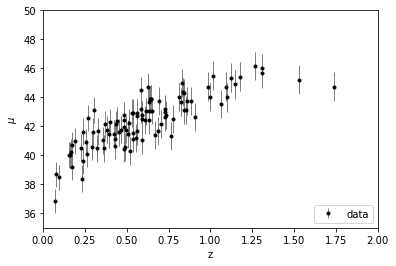

In [28]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

Linear regression

In [29]:
# reshape
z_sample_r = z_sample[:, np.newaxis]
mu_sample_r = mu_sample[:, np.newaxis]

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(z_sample_r, mu_sample_r, sample_weight=1/(dmu**2))

theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_

print(theta0, theta1)
X_new = np.array([[0], [2]])
y_pred = lin_reg.predict(X_new)

[39.48384602] [[4.76438865]]


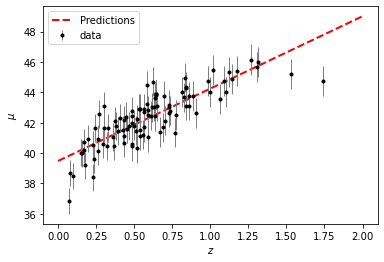

In [31]:
plt.plot(X_new, y_pred, "r--", linewidth=2, label="Predictions")
#plt.plot(X_grid, y_true, "k-.", label="Actual") # Comment this out to see that it agrees with the above
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("$z$")
plt.ylabel("$\mu$")
plt.legend(loc="upper left")
plt.show()

In [ ]:
Xtest = np.random.random((100,1))
ytest = 2.5*Xtest[:,0]**2 + 5.0*Xtest[:,0]**3

degree = 3
model = PolynomialRegression(degree) # fit 3rd degree polynomial
model.fit(Xtest, ytest)

y_pred = model.predict(Xtest)
n_constraints = degree + 1

print(model.coef_)